01 -  Importação das bibliotecas e base de dados

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [224]:
dataset = pd.read_csv('./datasets/HRDataset_v14.csv')

In [225]:
dataset.shape

(311, 36)

In [226]:
dataset.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


02 - Tratamento de dados para melhor entendimento

In [227]:
dataset.columns = ['Nome', 'ID', 'CASADO', 'ESTADO_CIVIL', 'GENERO', 'STATUS_EMPREGO', 'DEPARTAMENTOID', 'PONTUACAO_DESEMPENHO', 'DIVERSIDADE', 'SALARIO', 'DEMITIDO', 'POSICAO', 'NAME_POSICAO', 'ESTADO_RESIDE', 'CODIGO_POSTAL', 'DATA_NASCIMENTO', 'SEXO', 'ESTADO__CIVIL', 'ROTULO_CIDADAO', 'HISPANICO/LATINO', 'RACA', 'DATA_CONTATACAO', 'RESCINDIDA', 'MOTIVO_REENCIDIDA', 'SITUACAO_PROFISSIONAL', 'DEPARTAMENTO', 'GERENTE_PESSOA', 'ID_GERENTE', 'FONTE_RECRUTAMENTO', 'PONTUACAO_PERFORMACE', 'ENGAJAMENTO', 'PONTUACAO_SATISFACAO', 'N_PROJETOS', 'DATA_DESEMPENHO', 'N_ATRASOS', 'N_AUSENTE']

In [248]:
from datetime import datetime, date
today = date.today()
i=0
for data in dataset['DATA_NASCIMENTO']:
    born = datetime.strptime(data, "%m/%d/%y").date()
    dataset['DATA_NASCIMENTO'][i] = today.year - born.year
    i=i+1

dataset['DATA_NASCIMENTO'] = dataset['DATA_NASCIMENTO'].astype(int)
dataset['DATA_NASCIMENTO'] < 0

TypeError: strptime() argument 1 must be str, not int

In [251]:
for date in dataset['DATA_NASCIMENTO']:
    if date<0:
        print(date)

-43
-35
-44
-41
-41
-43
-40
-28
-42
-29
-28
-44
-32
-40
-45
-41
-29
-43
-43
-41
-36
-31
-45
-44
-29
-38
-31
-41
-45
-40
-42
-45
-45
-30
-42
-42
-44
-45
-45
-32
-42
-35


In [229]:
dataset['DATA_NASCIMENTO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 311 entries, 0 to 310
Series name: DATA_NASCIMENTO
Non-Null Count  Dtype
--------------  -----
311 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [230]:
dataset.columns

Index(['Nome', 'ID', 'CASADO', 'ESTADO_CIVIL', 'GENERO', 'STATUS_EMPREGO',
       'DEPARTAMENTOID', 'PONTUACAO_DESEMPENHO', 'DIVERSIDADE', 'SALARIO',
       'DEMITIDO', 'POSICAO', 'NAME_POSICAO', 'ESTADO_RESIDE', 'CODIGO_POSTAL',
       'DATA_NASCIMENTO', 'SEXO', 'ESTADO__CIVIL', 'ROTULO_CIDADAO',
       'HISPANICO/LATINO', 'RACA', 'DATA_CONTATACAO', 'RESCINDIDA',
       'MOTIVO_REENCIDIDA', 'SITUACAO_PROFISSIONAL', 'DEPARTAMENTO',
       'GERENTE_PESSOA', 'ID_GERENTE', 'FONTE_RECRUTAMENTO',
       'PONTUACAO_PERFORMACE', 'ENGAJAMENTO', 'PONTUACAO_SATISFACAO',
       'N_PROJETOS', 'DATA_DESEMPENHO', 'N_ATRASOS', 'N_AUSENTE'],
      dtype='object')

In [231]:
dataset.describe()

,ID,CASADO,ESTADO_CIVIL,GENERO,STATUS_EMPREGO,DEPARTAMENTOID,PONTUACAO_DESEMPENHO,DIVERSIDADE,SALARIO,DEMITIDO,POSICAO,CODIGO_POSTAL,DATA_NASCIMENTO,ID_GERENTE,ENGAJAMENTO,PONTUACAO_SATISFACAO,N_PROJETOS,N_ATRASOS,N_AUSENTE
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,30.903537,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,28.335610,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,-45.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,35.000000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,40.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,45.500000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,54.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


03 - Visualização dos dados

In [232]:
dataset.head()

,Nome,ID,CASADO,ESTADO_CIVIL,GENERO,STATUS_EMPREGO,DEPARTAMENTOID,PONTUACAO_DESEMPENHO,DIVERSIDADE,SALARIO,...,GERENTE_PESSOA,ID_GERENTE,FONTE_RECRUTAMENTO,PONTUACAO_PERFORMACE,ENGAJAMENTO,PONTUACAO_SATISFACAO,N_PROJETOS,DATA_DESEMPENHO,N_ATRASOS,N_AUSENTE
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [233]:
dataset.isnull().sum().sort_values(ascending=True)

Nome                       0
DATA_DESEMPENHO            0
N_PROJETOS                 0
PONTUACAO_SATISFACAO       0
ENGAJAMENTO                0
PONTUACAO_PERFORMACE       0
FONTE_RECRUTAMENTO         0
GERENTE_PESSOA             0
DEPARTAMENTO               0
SITUACAO_PROFISSIONAL      0
MOTIVO_REENCIDIDA          0
DATA_CONTATACAO            0
RACA                       0
HISPANICO/LATINO           0
ROTULO_CIDADAO             0
N_ATRASOS                  0
ESTADO__CIVIL              0
DATA_NASCIMENTO            0
ID                         0
CASADO                     0
ESTADO_CIVIL               0
GENERO                     0
STATUS_EMPREGO             0
DEPARTAMENTOID             0
SEXO                       0
PONTUACAO_DESEMPENHO       0
SALARIO                    0
DEMITIDO                   0
POSICAO                    0
NAME_POSICAO               0
ESTADO_RESIDE              0
CODIGO_POSTAL              0
DIVERSIDADE                0
N_AUSENTE                  0
ID_GERENTE    

<AxesSubplot:>

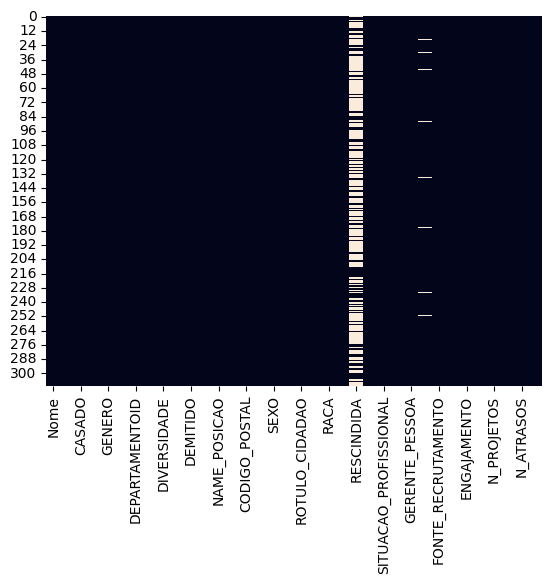

In [234]:
sns.heatmap(dataset.isnull(), cbar = False)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'CASADO'}>,
        <AxesSubplot:title={'center':'ESTADO_CIVIL'}>,
        <AxesSubplot:title={'center':'GENERO'}>],
       [<AxesSubplot:title={'center':'STATUS_EMPREGO'}>,
        <AxesSubplot:title={'center':'DEPARTAMENTOID'}>,
        <AxesSubplot:title={'center':'PONTUACAO_DESEMPENHO'}>,
        <AxesSubplot:title={'center':'DIVERSIDADE'}>],
       [<AxesSubplot:title={'center':'SALARIO'}>,
        <AxesSubplot:title={'center':'DEMITIDO'}>,
        <AxesSubplot:title={'center':'POSICAO'}>,
        <AxesSubplot:title={'center':'CODIGO_POSTAL'}>],
       [<AxesSubplot:title={'center':'DATA_NASCIMENTO'}>,
        <AxesSubplot:title={'center':'ID_GERENTE'}>,
        <AxesSubplot:title={'center':'ENGAJAMENTO'}>,
        <AxesSubplot:title={'center':'PONTUACAO_SATISFACAO'}>],
       [<AxesSubplot:title={'center':'N_PROJETOS'}>,
        <AxesSubplot:title={'center':'N_ATRASOS'}>,
        <AxesSubplot:title=

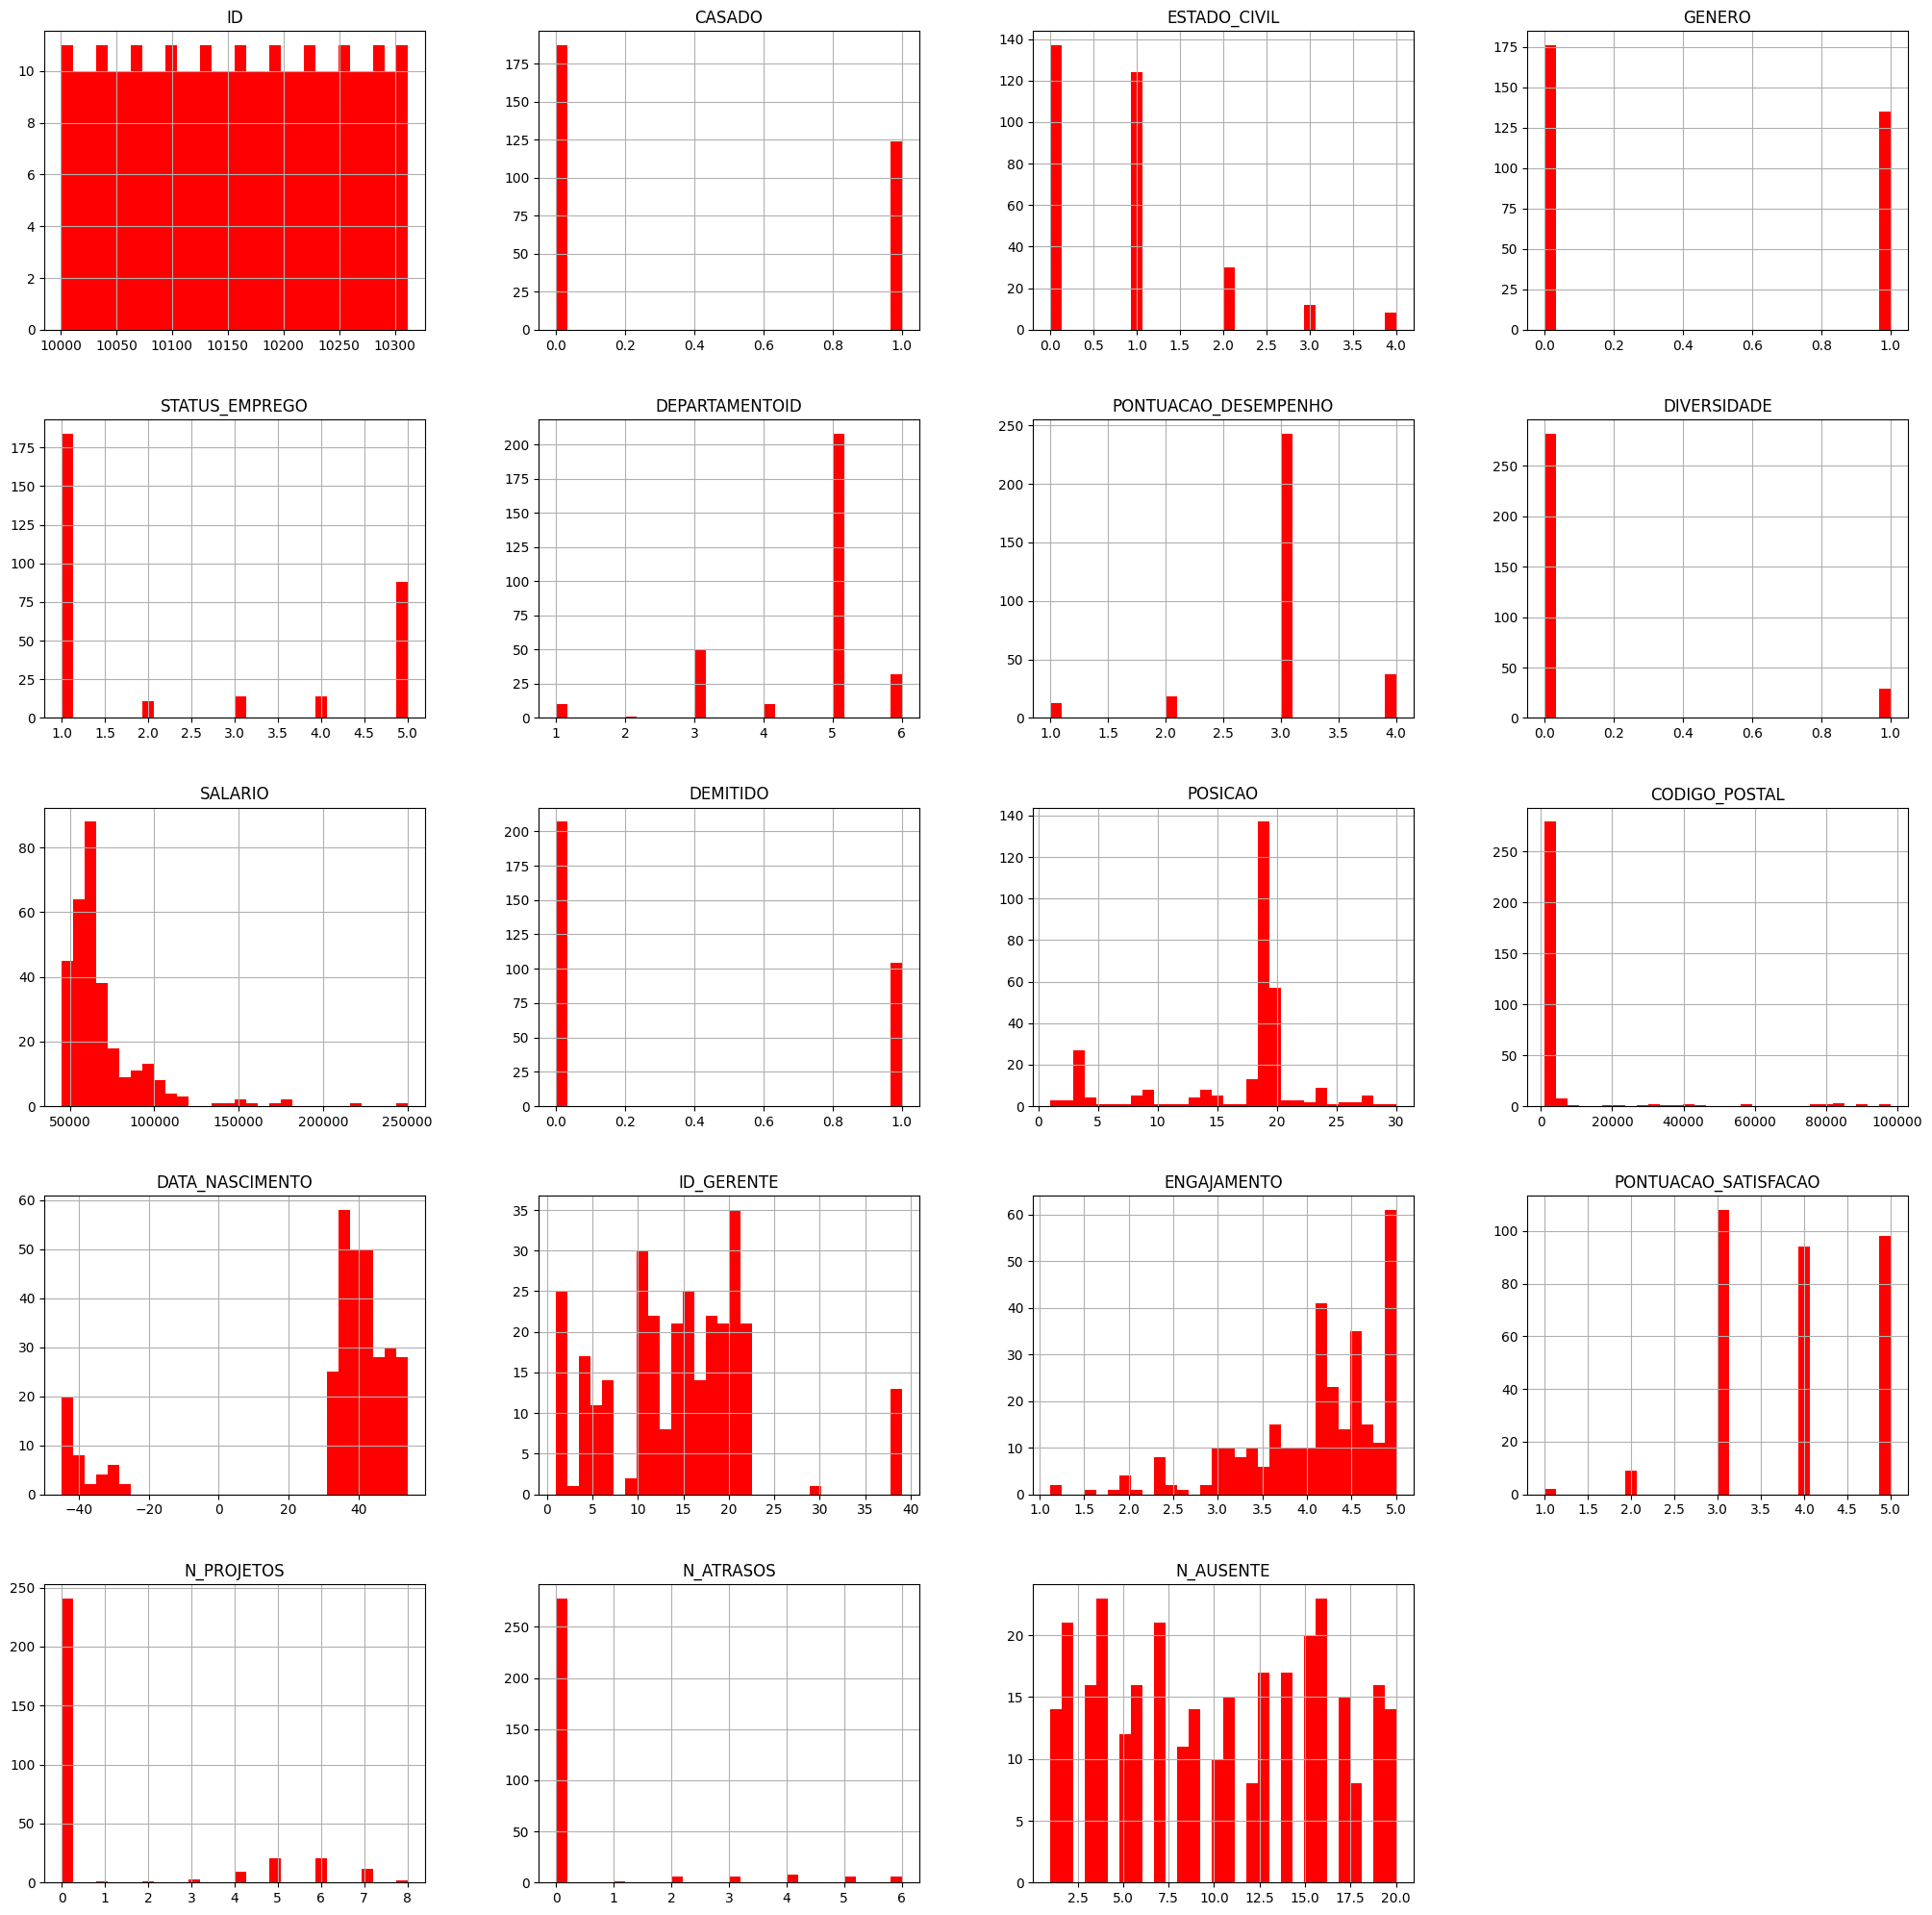

In [235]:
dataset.hist(bins=30, figsize=(25,25), color ='r')

In [236]:
left_df = dataset[dataset['DEMITIDO'] == 1]
stayed_df = dataset[dataset['DEMITIDO'] == 0]

In [237]:
print("Total = ", len(dataset))
print("Número de funcionários que saíram da empresa = ", len(left_df))
print("Porcentagem de funcionários que saíram da empresa = ", (len(left_df) / len(dataset)) * 100)
print('Número de pessoa que permeceram na empresa = ', len(stayed_df))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(stayed_df) / len(dataset)) * 100)

Total =  311
Número de funcionários que saíram da empresa =  104
Porcentagem de funcionários que saíram da empresa =  33.440514469453376
Número de pessoa que permeceram na empresa =  207
Porcentagem de funcionários que ficaram na empresa =  66.55948553054662


In [238]:
left_df.describe()

,ID,CASADO,ESTADO_CIVIL,GENERO,STATUS_EMPREGO,DEPARTAMENTOID,PONTUACAO_DESEMPENHO,DIVERSIDADE,SALARIO,DEMITIDO,POSICAO,CODIGO_POSTAL,DATA_NASCIMENTO,ID_GERENTE,ENGAJAMENTO,PONTUACAO_SATISFACAO,N_PROJETOS,N_ATRASOS,N_AUSENTE
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,10167.701923,0.451923,0.942308,0.423077,4.788462,4.711538,2.903846,0.153846,65690.076923,1.0,18.134615,3244.894231,30.298077,16.903846,4.090481,3.884615,0.730769,0.663462,11.048077
std,89.400146,0.500093,0.943315,0.496440,0.633576,0.920881,0.566358,0.362548,18679.799457,0.0,4.975782,5814.112301,29.376987,10.380638,0.810150,0.862461,1.849853,1.646477,5.808230
min,10004.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45115.000000,1.0,2.000000,1420.000000,-45.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000
25%,10090.750000,0.000000,0.000000,0.000000,5.000000,5.000000,3.000000,0.000000,53546.000000,1.0,19.000000,1901.750000,35.000000,11.000000,3.585000,3.000000,0.000000,0.000000,6.000000
50%,10170.500000,0.000000,1.000000,0.000000,5.000000,5.000000,3.000000,0.000000,60547.000000,1.0,19.000000,2133.500000,40.000000,16.000000,4.220000,4.000000,0.000000,0.000000,11.000000
75%,10249.750000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,70267.000000,1.0,20.000000,2374.500000,47.000000,20.000000,4.715000,5.000000,0.000000,0.000000,16.000000
max,10305.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,148999.000000,1.0,30.000000,43050.000000,54.000000,39.000000,5.000000,5.000000,7.000000,6.000000,20.000000


In [239]:
stayed_df.describe()

,ID,CASADO,ESTADO_CIVIL,GENERO,STATUS_EMPREGO,DEPARTAMENTOID,PONTUACAO_DESEMPENHO,DIVERSIDADE,SALARIO,DEMITIDO,POSICAO,CODIGO_POSTAL,DATA_NASCIMENTO,ID_GERENTE,ENGAJAMENTO,PONTUACAO_SATISFACAO,N_PROJETOS,N_ATRASOS,N_AUSENTE
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.0,207.000000,207.000000,207.000000,199.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10150.120773,0.371981,0.743961,0.439614,1.188406,4.560386,3.014493,0.062802,70694.033816,0.0,16.198068,8218.772947,31.207729,13.351759,4.119807,3.893720,1.463768,0.289855,9.830918
std,89.823127,0.484505,0.938471,0.497543,0.538120,1.155391,0.595112,0.243195,27739.416425,0.0,6.681695,20124.948327,27.865320,6.255251,0.781390,0.933887,2.532774,1.058045,5.846367
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.0,1.000000,1013.000000,-45.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10075.000000,0.000000,0.000000,0.000000,1.000000,4.000000,3.000000,0.000000,56593.000000,0.0,14.000000,1896.000000,35.000000,8.000000,3.730000,3.000000,0.000000,0.000000,4.000000
50%,10150.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,63051.000000,0.0,19.000000,2132.000000,40.000000,14.000000,4.290000,4.000000,0.000000,0.000000,10.000000
75%,10225.500000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,0.000000,72816.000000,0.0,19.500000,2351.000000,45.000000,19.000000,4.670000,5.000000,3.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,3.000000,6.000000,4.000000,1.000000,250000.000000,0.0,28.000000,98052.000000,54.000000,22.000000,5.000000,5.000000,8.000000,6.000000,20.000000


<AxesSubplot:>

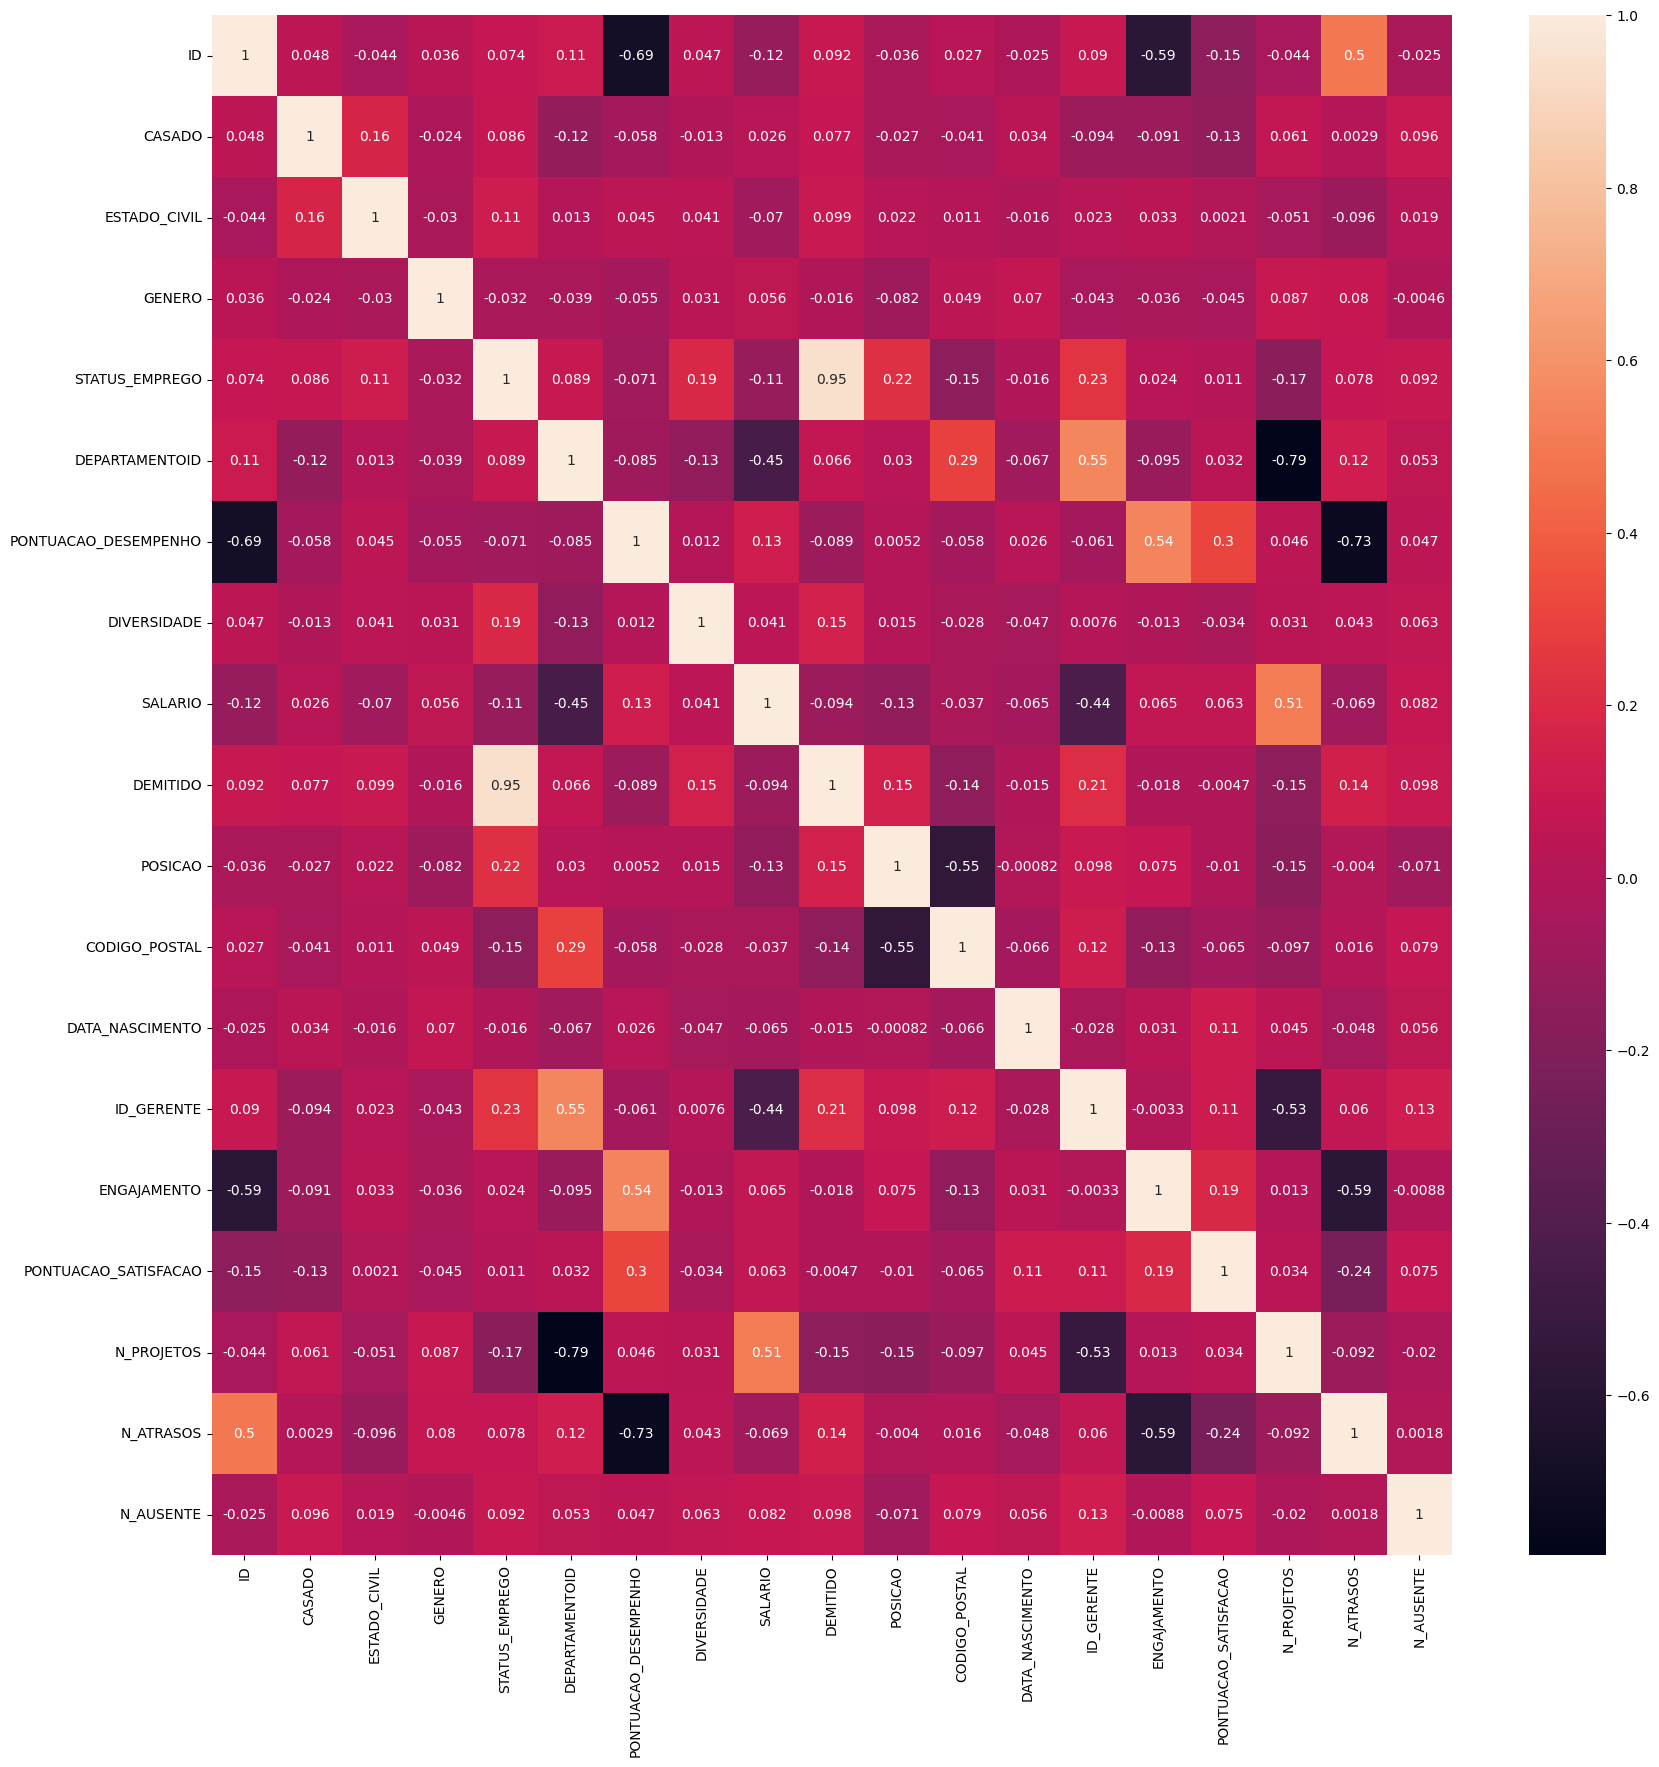

In [240]:
correlations = dataset.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

<AxesSubplot:xlabel='SALARIO', ylabel='SEXO'>

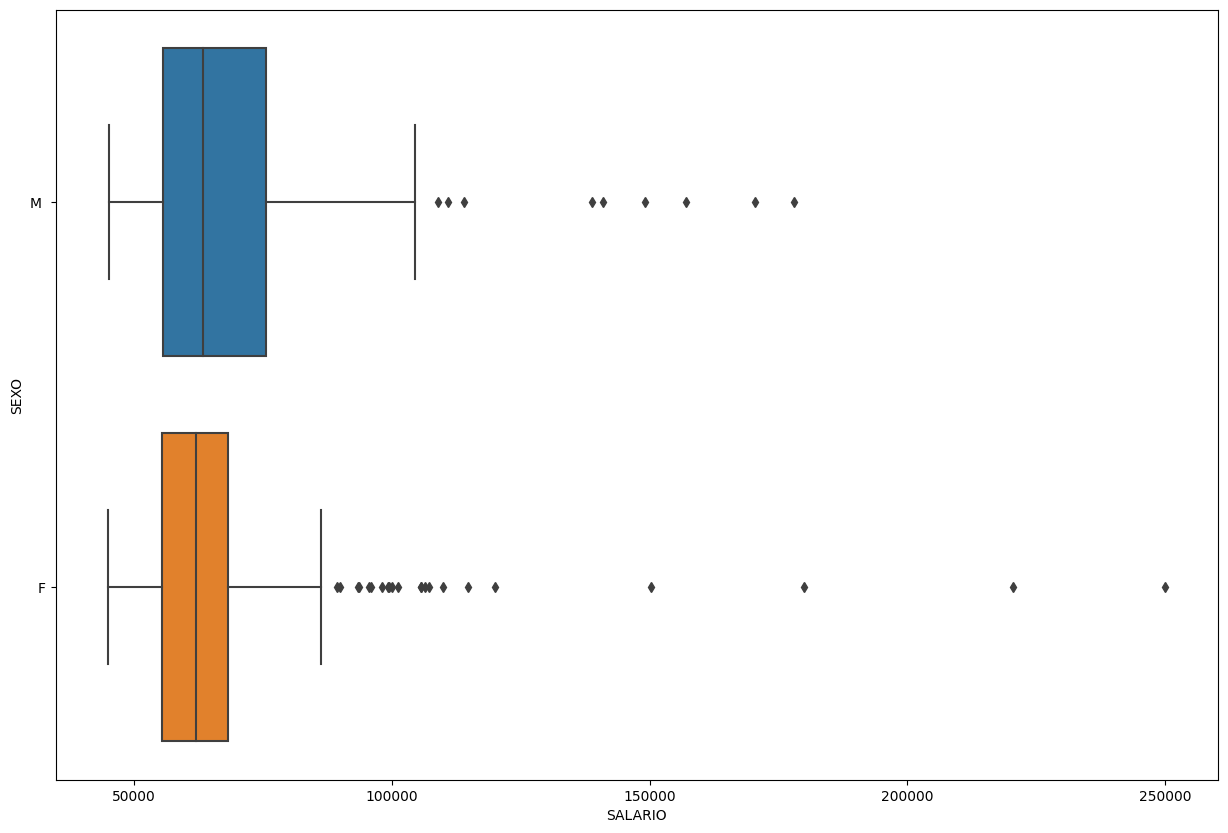

In [241]:
plt.figure(figsize=[15,10])
sns.boxplot(x = 'SALARIO', y= 'SEXO', data=dataset)

In [242]:
dataset['NAME_POSICAO']

0       Production Technician I
1                       Sr. DBA
2      Production Technician II
3       Production Technician I
4       Production Technician I
                 ...           
306    Production Technician II
307     Production Technician I
308                         CIO
309                Data Analyst
310     Production Technician I
Name: NAME_POSICAO, Length: 311, dtype: object

<AxesSubplot:xlabel='SALARIO', ylabel='NAME_POSICAO'>

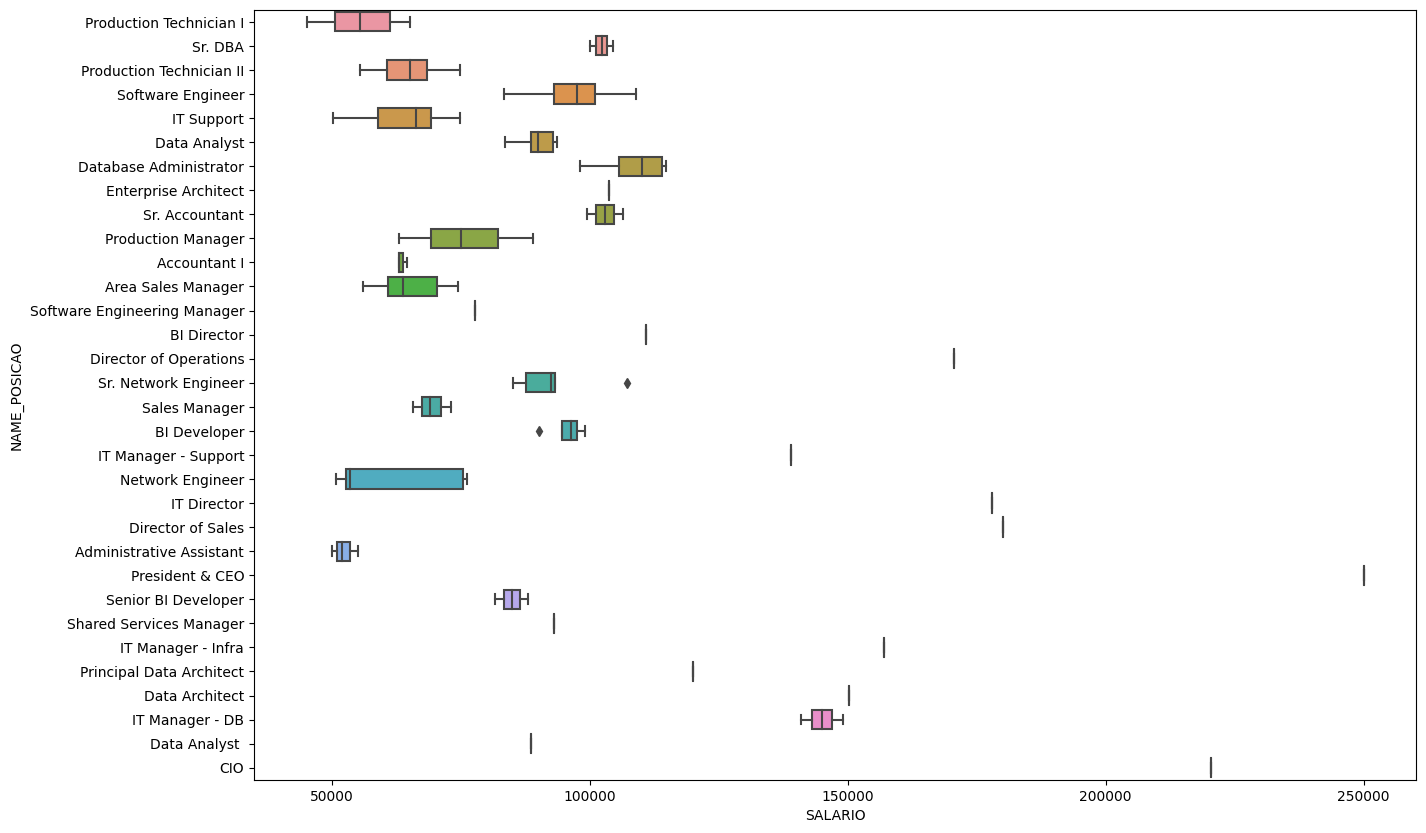

In [243]:
plt.figure(figsize=[15,10])
sns.boxplot(x = 'SALARIO', y= 'NAME_POSICAO', data=dataset)

04 -  Pré-Processamento e bases de treinamento/teste

In [244]:
dataset.head()

,Nome,ID,CASADO,ESTADO_CIVIL,GENERO,STATUS_EMPREGO,DEPARTAMENTOID,PONTUACAO_DESEMPENHO,DIVERSIDADE,SALARIO,...,GERENTE_PESSOA,ID_GERENTE,FONTE_RECRUTAMENTO,PONTUACAO_PERFORMACE,ENGAJAMENTO,PONTUACAO_SATISFACAO,N_PROJETOS,DATA_DESEMPENHO,N_ATRASOS,N_AUSENTE
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [245]:
X_cat = dataset[['NAME_POSICAO', 'ESTADO_RESIDE', 'ESTADO__CIVIL', 'RACA', 'SITUACAO_PROFISSIONAL', 'DEPARTAMENTO', 'GERENTE_PESSOA', 'FONTE_RECRUTAMENTO', 'PONTUACAO_PERFORMACE']]
X_cat

,NAME_POSICAO,ESTADO_RESIDE,ESTADO__CIVIL,RACA,SITUACAO_PROFISSIONAL,DEPARTAMENTO,GERENTE_PESSOA,FONTE_RECRUTAMENTO,PONTUACAO_PERFORMACE
0,Production Technician I,MA,Single,White,Active,Production,Michael Albert,LinkedIn,Exceeds
1,Sr. DBA,MA,Married,White,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets
2,Production Technician II,MA,Married,White,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets
3,Production Technician I,MA,Married,White,Active,Production,Elijiah Gray,Indeed,Fully Meets
4,Production Technician I,MA,Divorced,White,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets
...,...,...,...,...,...,...,...,...,...
306,Production Technician II,MA,Single,White,Active,Production,Kissy Sullivan,LinkedIn,Fully Meets
307,Production Technician I,MA,Single,Asian,Voluntarily Terminated,Production,Brannon Miller,Google Search,PIP
308,CIO,MA,Single,White,Active,IT/IS,Janet King,Employee Referral,Exceeds
309,Data Analyst,MA,Single,White,Active,IT/IS,Simon Roup,Employee Referral,Fully Meets


In [246]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [247]:
X_cat.shape
dataset['DATA_NASCIMENTO']

0      40
1      48
2      35
3      35
4      34
       ..
306    38
307    41
308    44
309    44
310    45
Name: DATA_NASCIMENTO, Length: 311, dtype: int64